<h1 align = 'center'> Learning To See </h1>

<h2 align = 'center'> Part 12: Let's Get Greedy</h2>

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pickle as pickle
import supportFunctions
import time
import importlib
importlib.reload(supportFunctions)

pickleFileName = 'data/fingerDataSet' + '.pickle'
with open(pickleFileName, 'rb') as pickleFile:
    data = pickle.load(pickleFile, encoding='bytes')

In [6]:
#Return to just using 3 images at training data:
trainingExampleIndices = [7, 30, 46]
trainingExamples = [data[index] for index in trainingExampleIndices]
trainX, trainY = supportFunctions.extractExamplesFromList(trainingExamples, whichImage = b'image1bit', dist = 4)

#And two for testing:
testingExampleIndices = [40, 41]
testingExamples = [data[index] for index in testingExampleIndices]
testX, testY = supportFunctions.extractExamplesFromList(testingExamples, whichImage = b'image1bit', dist = 4)

## Find best 3 pixel rule again

In [7]:
import itertools

rules = []
numErrors = []
startTime = time.time()

for c in itertools.combinations(range(81), 3):
    i = c[0]; j = c[1]; k = c[2]

    yHat = np.logical_and(np.logical_and(trainX[:,i] == 0, trainX[:,j]==0), trainX[:,k]==0)
    numErrors.append(sum(abs(yHat-trainY)))
    rules.append([i, j, k, 0, 0, 0])

    yHat = np.logical_and(np.logical_and(trainX[:,i] == 0, trainX[:,j]==0), trainX[:,k]==1)
    numErrors.append(sum(abs(yHat-trainY)))
    rules.append([i, j, k, 0, 0, 1])

    yHat = np.logical_and(np.logical_and(trainX[:,i] == 0, trainX[:,j]==1), trainX[:,k]==0)
    numErrors.append(sum(abs(yHat-trainY)))
    rules.append([i, j, k, 0, 1, 0])

    yHat = np.logical_and(np.logical_and(trainX[:,i] == 0, trainX[:,j]==1), trainX[:,k]==1)
    numErrors.append(sum(abs(yHat-trainY)))
    rules.append([i, j, k, 0, 1, 1])

    yHat = np.logical_and(np.logical_and(trainX[:,i] == 1, trainX[:,j]==0), trainX[:,k]==0)
    numErrors.append(sum(abs(yHat-trainY)))
    rules.append([i, j, k, 1, 0, 0])

    yHat = np.logical_and(np.logical_and(trainX[:,i] == 1, trainX[:,j]==0), trainX[:,k]==1)
    numErrors.append(sum(abs(yHat-trainY)))
    rules.append([i, j, k, 1, 0, 1])

    yHat = np.logical_and(np.logical_and(trainX[:,i] == 1, trainX[:,j]==1), trainX[:,k]==0)
    numErrors.append(sum(abs(yHat-trainY)))
    rules.append([i, j, k, 1, 1, 0])

    yHat = np.logical_and(np.logical_and(trainX[:,i] == 1, trainX[:,j]==1), trainX[:,k]==1)
    numErrors.append(sum(abs(yHat-trainY)))
    rules.append([i, j, k, 1, 1, 1])
    
timeElapsed = time.time()-startTime
print ('Time elapsed = ' + str(round(timeElapsed, 3)) + ' seconds.')

Time elapsed = 421.631 seconds.


In [8]:
np.argmin(np.array(numErrors))

218858

In [9]:
rules[218858]

[9, 40, 53, 0, 1, 0]

In [10]:
rule = lambda X: np.logical_and(np.logical_and(X[:, 9] == 0, X[:,40] == 1), X[:, 53] == 0)

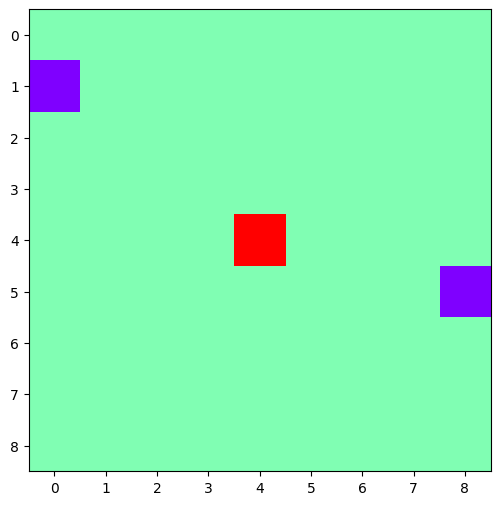

In [12]:
ruleVector = np.zeros(81)
ruleVector[9] = -1; ruleVector[40] = 1; ruleVector[53] = -1

fig = plt.figure(0, (6,6))
plt.imshow(ruleVector.reshape(9,9), interpolation = 'none', cmap = 'rainbow')

## Plot number of errors as a function of performance on training set.

Text(0, 0.5, 'Number of Errors')

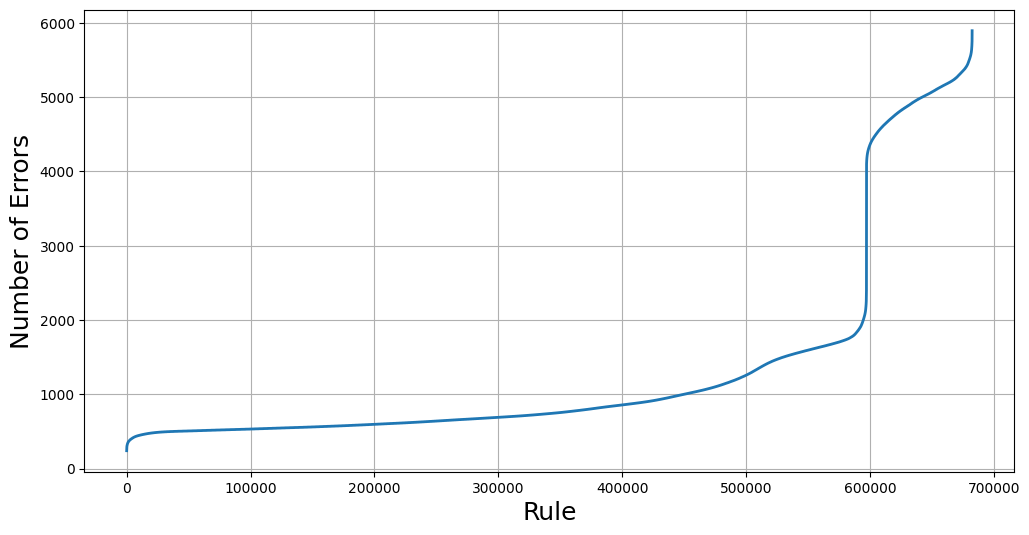

In [13]:
fig = plt.figure(0, (12, 6))
plt.plot(np.sort(numErrors), linewidth = 2)
plt.grid(1)
plt.xlabel('Rule', fontsize = 18)
plt.ylabel('Number of Errors', fontsize = 18)

## Now, training and testing error for first 100 rules

In [14]:
sI = np.argsort(np.array(numErrors))
testingErrors = []
trainingErrors= []

for i in range(100):
    r = rules[sI[i]]
    rule = lambda X: np.logical_and(np.logical_and(X[:, r[0]] == r[3], X[:,r[1]] == r[4]), X[:, r[2]] == r[5])
    trainingErrors.append(sum(abs(rule(trainX)-trainY)))
    testingErrors.append(sum(abs(rule(testX)-testY)))

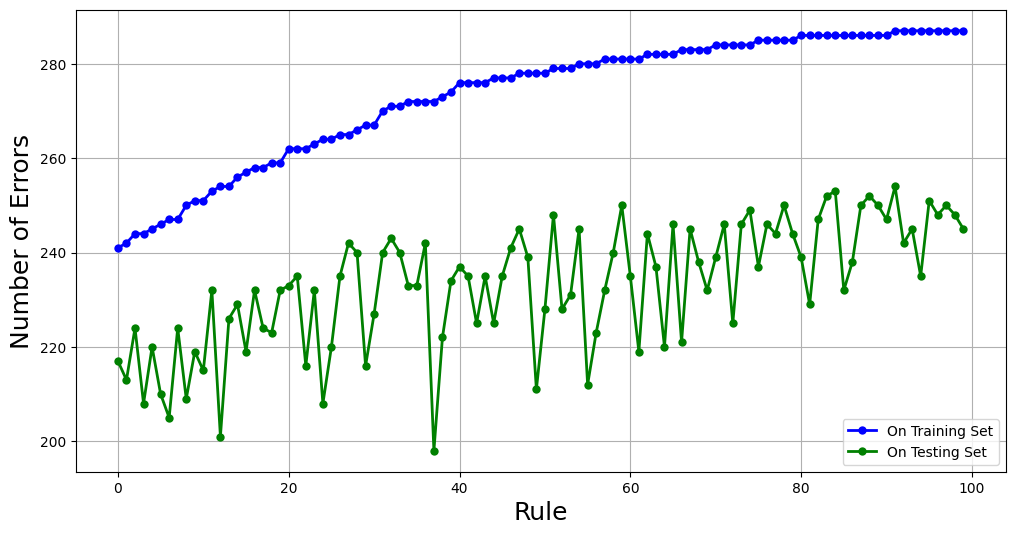

In [15]:
fig = plt.figure(0, (12, 6))
plt.plot(trainingErrors, 'bo-', linewidth = 2, markeredgecolor= 'none')
plt.plot(testingErrors, 'go-', linewidth = 2, markeredgecolor= 'none')
plt.plot()
plt.grid(1)
plt.xlabel('Rule', fontsize = 18)
plt.ylabel('Number of Errors', fontsize = 18)
plt.legend(['On Training Set', 'On Testing Set'], loc = 4)